In [1]:
%pip install -Uq matplotlib
import matplotlib
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import wordnet
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger_ru')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('universal_tagset')
from nltk.stem import SnowballStemmer


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Елизавета\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_ru to
[nltk_data]     C:\Users\Елизавета\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_ru is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Елизавета\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\Елизавета\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


In [2]:
with open("1_Nahalenok_1925.txt", "r", encoding="utf-8") as file:
    text1 = file.read()

In [3]:
sentences = sent_tokenize(text1, language='russian')

for sentence in sentences:
    words = nltk.word_tokenize(sentence)
    tag_words = nltk.pos_tag(words, lang='rus') 
    
    print(tag_words)

[('Снится', 'V'), ('Мишке', 'S'), (',', 'NONLEX'), ('будто', 'CONJ'), ('дед', 'S'), ('срезал', 'V'), ('в', 'PR'), ('саду', 'S'), ('здоровенную', 'A=f'), ('вишневую', 'A=f'), ('хворостину', 'S'), (',', 'NONLEX'), ('идет', 'V'), ('к', 'PR'), ('нему', 'S-PRO'), (',', 'NONLEX'), ('хворостиной', 'A=sg'), ('машет', 'S'), (',', 'NONLEX'), ('а', 'CONJ'), ('сам', 'A-PRO=m'), ('строго', 'ADV'), ('так', 'ADV-PRO'), ('говорит', 'V'), ('.', 'NONLEX')]
[('—', 'NONLEX'), ('А', 'CONJ'), ('ну', 'PART'), (',', 'NONLEX'), ('иди', 'V'), ('сюда', 'ADV-PRO'), (',', 'NONLEX'), ('Михайло', 'S'), ('Фомич', 'S'), (',', 'NONLEX'), ('я', 'S-PRO'), ('те', 'A-PRO=pl'), ('полохану', 'V'), ('по', 'PR'), ('тем', 'A-PRO=pl'), ('местам', 'S'), (',', 'NONLEX'), ('откель', 'S'), ('ноги', 'S'), ('растут', 'V'), ('!', 'NONLEX'), ('..', 'NONLEX')]
[('—', 'V'), ('За', 'PR'), ('что', 'S-PRO'), (',', 'NONLEX'), ('дедуня', 'S'), ('?', 'NONLEX')]
[('—', 'NONLEX'), ('спрашивает', 'V'), ('Мишка', 'S'), ('.', 'NONLEX')]
[('—', 'NONL

In [4]:
sentences = sent_tokenize(text1, language='russian')
lemmatizer = WordNetLemmatizer()

#Обработка каждого предложения
for sentence in sentences:
    
    words = word_tokenize(sentence)
    #Лемматизация
    lemmatized = [lemmatizer.lemmatize(word) for word in words]
    print(words)
    print(' '.join(lemmatized))

['Снится', 'Мишке', ',', 'будто', 'дед', 'срезал', 'в', 'саду', 'здоровенную', 'вишневую', 'хворостину', ',', 'идет', 'к', 'нему', ',', 'хворостиной', 'машет', ',', 'а', 'сам', 'строго', 'так', 'говорит', '.']
Снится Мишке , будто дед срезал в саду здоровенную вишневую хворостину , идет к нему , хворостиной машет , а сам строго так говорит .
['—', 'А', 'ну', ',', 'иди', 'сюда', ',', 'Михайло', 'Фомич', ',', 'я', 'те', 'полохану', 'по', 'тем', 'местам', ',', 'откель', 'ноги', 'растут', '!', '..']
— А ну , иди сюда , Михайло Фомич , я те полохану по тем местам , откель ноги растут ! ..
['—', 'За', 'что', ',', 'дедуня', '?']
— За что , дедуня ?
['—', 'спрашивает', 'Мишка', '.']
— спрашивает Мишка .
['—', 'А', 'за', 'то', ',', 'что', 'ты', 'в', 'курятнике', 'из', 'гнезда', 'чубатой', 'курицы', 'все', 'яйца', 'покрал', 'и', 'на', 'каруселю', 'отнес', ',', 'прокатал', '!', '..']
— А за то , что ты в курятнике из гнезда чубатой курицы все яйца покрал и на каруселю отнес , прокатал ! ..
['—', 

In [5]:
# лемматизация с учетом части речи
# меняем теги
tokenized = nltk.word_tokenize(text1)
tagged = nltk.pos_tag(tokenized)

def pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return nltk.corpus.wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return nltk.corpus.wordnet.VERB
    elif nltk_tag.startswith('N'):
        return nltk.corpus.wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return nltk.corpus.wordnet.ADV
    else:          
        return None

tagged

[('Снится', 'NN'),
 ('Мишке', 'NN'),
 (',', ','),
 ('будто', 'NNP'),
 ('дед', 'NNP'),
 ('срезал', 'NNP'),
 ('в', 'NNP'),
 ('саду', 'NNP'),
 ('здоровенную', 'NNP'),
 ('вишневую', 'NNP'),
 ('хворостину', 'NNP'),
 (',', ','),
 ('идет', 'NNP'),
 ('к', 'NNP'),
 ('нему', 'NNP'),
 (',', ','),
 ('хворостиной', 'NNP'),
 ('машет', 'NNP'),
 (',', ','),
 ('а', 'NNP'),
 ('сам', 'NNP'),
 ('строго', 'NNP'),
 ('так', 'NNP'),
 ('говорит', 'NNP'),
 ('.', '.'),
 ('—', 'VB'),
 ('А', 'JJ'),
 ('ну', 'NNP'),
 (',', ','),
 ('иди', 'NNP'),
 ('сюда', 'NNP'),
 (',', ','),
 ('Михайло', 'NNP'),
 ('Фомич', 'NNP'),
 (',', ','),
 ('я', 'NNP'),
 ('те', 'NNP'),
 ('полохану', 'NNP'),
 ('по', 'NNP'),
 ('тем', 'NNP'),
 ('местам', 'NNP'),
 (',', ','),
 ('откель', 'NNP'),
 ('ноги', 'NNP'),
 ('растут', 'NN'),
 ('!', '.'),
 ('..', 'JJ'),
 ('—', 'JJ'),
 ('За', 'NN'),
 ('что', 'NN'),
 (',', ','),
 ('дедуня', 'VB'),
 ('?', '.'),
 ('—', 'JJ'),
 ('спрашивает', 'NN'),
 ('Мишка', 'NNP'),
 ('.', '.'),
 ('—', 'VB'),
 ('А', 'JJ'),
 ('з

In [6]:
# NOUN - существительное.
# ADJ - прилагательное.
# VERB - глагол.
# ADV - наречие.
# PRON - местоимение.
# NUM - числительное.
# CONJ - союз.
# ADP - предлог.
# DET - детерминер (определитель).
# PRT - частица.
# X - другое.

In [7]:
from collections import Counter
lower_case = text1.lower()
tokens = nltk.word_tokenize(lower_case)
tags = nltk.pos_tag(tokens)
counts = Counter( tag for word,  tag in tags)
print(counts)

# Имен собственных больше всего, значит много диалогов
# Глаголы в настоящем времени, события происходят в моменте 

Counter({'NNP': 5572, ',': 973, 'JJ': 819, 'NN': 753, '.': 693, 'VB': 297, ':': 134, 'CC': 15, '(': 1, ')': 1, 'FW': 1, 'IN': 1, 'CD': 1})


In [8]:
# S: существительное.
# NONLEX: нелексическое слово (например, междометия и другие нелексические элементы).
# V: глагол.
# PR: предлог.
# CONJ: союз.
# S-PRO: местоимение существительное (например, "он", "она").
# ADV: наречие.
# PART: частица.
# ADV-PRO: местоимение-наречие (например, "где", "как").
# A=m, A=f, A=pl: прилагательные с разными морфологическими признаками (род и число).
# A-PRO=m, A-PRO=f, A-PRO=pl: местоименные прилагательные с разными морфологическими признаками.
# PRAEDIC: причастие или деепричастие.
# A=n, A=sg: прилагательные с другими морфологическими признаками (род и число).
# NUM=nom, NUM=acc, NUM=m, NUM=f: числительные с разными морфологическими признаками.
# INTJ: междометие (слова-восклицания).
# A=brev: краткое прилагательное.
# PARENTH: вводное слово.
# ADV=comp, ADV=comp2: сравнительные степени наречия.
# A-PRO=n: местоименное прилагательное с другими морфологическими признаками.

In [9]:
from collections import Counter
lower_case = text1.lower()
tokens = nltk.word_tokenize(lower_case)
tags = nltk.pos_tag(tokens, lang='rus')
counts = Counter( tag for word,  tag in tags)
print(counts)

# много междометий 

Counter({'S': 2352, 'NONLEX': 2240, 'V': 1614, 'PR': 890, 'CONJ': 511, 'S-PRO': 449, 'ADV': 256, 'PART': 220, 'ADV-PRO': 120, 'A=m': 112, 'A=f': 99, 'A=pl': 74, 'A-PRO=m': 62, 'A-PRO=f': 39, 'A-PRO=pl': 37, 'PRAEDIC': 29, 'A=n': 24, 'A=sg': 18, 'NUM=nom': 15, 'A-PRO=sg': 12, 'INTJ': 11, 'A-PRO': 10, 'PARENTH': 9, 'ADV=comp': 7, 'A-PRO=n': 6, 'A': 5, 'S-PRO=dat': 4, 'NUM=acc': 4, 'S-PRO=acc': 3, 'NUM=m': 3, 'S-PRO=ins': 3, 'ANUM=f': 3, 'ANUM=n': 2, 'S-PRO=pl': 2, 'ANUM=m': 2, 'A=brev': 2, 'NUM=f': 2, 'ADV=comp2': 2, 'PRAEDIC=comp': 2, 'ANUM=sg': 1, 'S-PRO=gen': 1, 'A=comp': 1, 'PRAEDIC-PRO': 1, 'NUM': 1, 'NUM=ciph': 1})


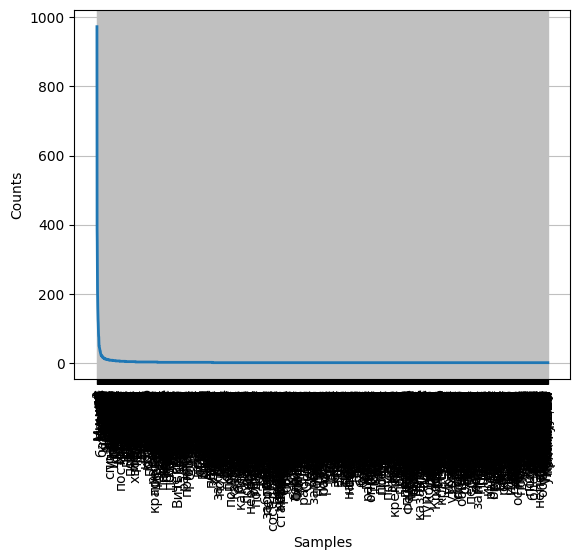

<Axes: xlabel='Samples', ylabel='Counts'>

In [10]:
words = nltk.tokenize.word_tokenize(text1)
fd = nltk.FreqDist(words)
fd.plot()
# На графике можно увидеть только имя Мишка ) этот способ анализа не подходит

In [11]:
text = ''' Снится Мишке, будто дед срезал в саду здоровенную вишневую хворостину, идет к нему, хворостиной машет, а сам строго так говорит.
 — А ну, иди сюда, Михайло Фомич, я те полохану по тем местам, откель ноги растут!..
 — За что, дедуня? — спрашивает Мишка.
 — А за то, что ты в курятнике из гнезда чубатой курицы все яйца покрал и на каруселю отнес, прокатал!..
 — Дедуня, я нонешний год не катался на каруселях! — в страхе кричит Мишка.
 Но дед степенно разгладил бороду да как топнет ногой:
 — Ложись, постреленыш, и спущай портки!..
 Вскрикнул Мишка и проснулся. Сердце бьется, словно в самом деле хворостины отпробовал. Чуточку открыл левый глаз — в хате светло. Утренняя зорька теплится за окошком. Приподнял Мишка голову, слышит в сенцах голоса: мамка визжит, лопочет что-то, смехом захлебывается, дед кашляет, а чей-то чужой голос: «Бу-бу-бу…»
 Протер Мишка глаза и видит: дверь открылась, хлопнула, дед в горницу бежит, подпрыгивает, очки на носу у него болтаются. Мишка сначала подумал, что поп с певчими пришел (на Пасху когда приходил он, дед так же суетился), да следом за дедом прет в горницу чужой большущий солдат в черной шинели и в шапке с лентами, но без козырька, а мамка на шее у него висит, воет.
 Посреди хаты стряхнул чужой человек мамку с шеи да как гаркнет:
 — А где мое потомство?'''

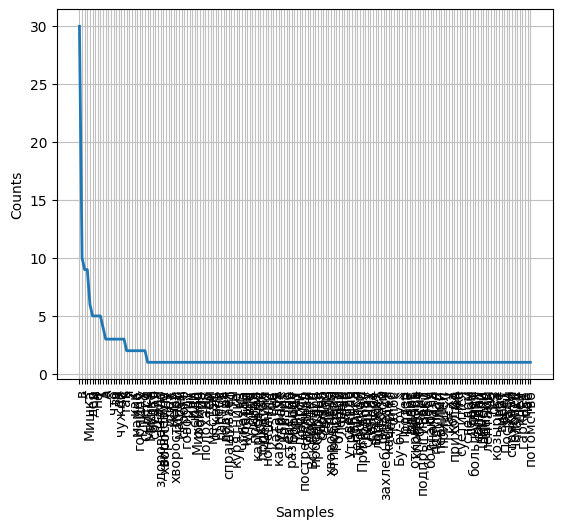

<Axes: xlabel='Samples', ylabel='Counts'>

In [12]:
words = nltk.tokenize.word_tokenize(text)
fd = nltk.FreqDist(words)
fd.plot()
# На графике можно увидеть только имя Мишка ) этот способ анализа не подходит

In [13]:
stemmer = SnowballStemmer("russian")

words = word_tokenize(text1)
for w in words:
    root_word = stemmer.stem(w)
    print(root_word)
    

снит
мишк
,
будт
дед
среза
в
сад
здоровен
вишнев
хворостин
,
идет
к
нем
,
хворостин
машет
,
а
сам
строг
так
говор
.
—
а
ну
,
ид
сюд
,
михайл
фомич
,
я
те
полохан
по
тем
мест
,
откел
ног
растут
!
..
—
за
что
,
дедун
?
—
спрашива
мишк
.
—
а
за
то
,
что
ты
в
курятник
из
гнезд
чубат
куриц
все
яйц
покра
и
на
карусел
отнес
,
проката
!
..
—
дедун
,
я
нонешн
год
не
ката
на
карусел
!
—
в
страх
крич
мишк
.
но
дед
степен
разглад
бород
да
как
топнет
ног
:
—
лож
,
постреленыш
,
и
спуща
портк
!
..
вскрикнул
мишк
и
проснул
.
сердц
бьет
,
словн
в
сам
дел
хворостин
отпробова
.
чуточк
откр
лев
глаз
—
в
хат
светл
.
утрен
зорьк
тепл
за
окошк
.
приподня
мишк
голов
,
слыш
в
сенц
голос
:
мамк
визж
,
лопочет
что-т
,
смех
захлебыва
,
дед
кашля
,
а
чей-т
чуж
голос
:
«
бу-бу-бу…
»
протер
мишк
глаз
и
вид
:
двер
откр
,
хлопнул
,
дед
в
горниц
беж
,
подпрыгива
,
очк
на
нос
у
нег
болта
.
мишк
снача
подума
,
что
поп
с
певч
пришел
(
на
пасх
когд
приход
он
,
дед
так
же
сует
)
,
да
след
за
дед
прет
в
горниц
чуж
большущ
с

In [14]:
tokenizer = nltk.tokenize.BlanklineTokenizer()
tokens = tokenizer.tokenize(text1)
print(len(tokenizer.tokenize(text1)))
# print(tokenizer.tokenize(text1))
print('Разделение текста по абзацам')

13
Разделение текста по абзацам


In [15]:
tokenizer = nltk.tokenize.WhitespaceTokenizer()
print(len(tokenizer.tokenize(text1)))
print(tokenizer.tokenize(text1))

7299
['Снится', 'Мишке,', 'будто', 'дед', 'срезал', 'в', 'саду', 'здоровенную', 'вишневую', 'хворостину,', 'идет', 'к', 'нему,', 'хворостиной', 'машет,', 'а', 'сам', 'строго', 'так', 'говорит.', '—', 'А', 'ну,', 'иди', 'сюда,', 'Михайло', 'Фомич,', 'я', 'те', 'полохану', 'по', 'тем', 'местам,', 'откель', 'ноги', 'растут!..', '—', 'За', 'что,', 'дедуня?', '—', 'спрашивает', 'Мишка.', '—', 'А', 'за', 'то,', 'что', 'ты', 'в', 'курятнике', 'из', 'гнезда', 'чубатой', 'курицы', 'все', 'яйца', 'покрал', 'и', 'на', 'каруселю', 'отнес,', 'прокатал!..', '—', 'Дедуня,', 'я', 'нонешний', 'год', 'не', 'катался', 'на', 'каруселях!', '—', 'в', 'страхе', 'кричит', 'Мишка.', 'Но', 'дед', 'степенно', 'разгладил', 'бороду', 'да', 'как', 'топнет', 'ногой:', '—', 'Ложись,', 'постреленыш,', 'и', 'спущай', 'портки!..', 'Вскрикнул', 'Мишка', 'и', 'проснулся.', 'Сердце', 'бьется,', 'словно', 'в', 'самом', 'деле', 'хворостины', 'отпробовал.', 'Чуточку', 'открыл', 'левый', 'глаз', '—', 'в', 'хате', 'светло.', 'У

In [16]:
tokenizer = nltk.data.load('tokenizers/punkt/russian.pickle')
tokens = tokenizer.tokenize(text1)
tokens


['\n Снится Мишке, будто дед срезал в саду здоровенную вишневую хворостину, идет к нему, хворостиной машет, а сам строго так говорит.',
 '—\xa0А ну, иди сюда, Михайло Фомич, я те полохану по тем местам, откель ноги растут!..',
 '—\xa0За что, дедуня?',
 '— спрашивает Мишка.',
 '—\xa0А за то, что ты в курятнике из гнезда чубатой курицы все яйца покрал и на каруселю отнес, прокатал!..',
 '—\xa0Дедуня, я нонешний год не катался на каруселях!',
 '— в страхе кричит Мишка.',
 'Но дед степенно разгладил бороду да как топнет ногой:\n —\xa0Ложись, постреленыш, и спущай портки!..',
 'Вскрикнул Мишка и проснулся.',
 'Сердце бьется, словно в самом деле хворостины отпробовал.',
 'Чуточку открыл левый глаз — в хате светло.',
 'Утренняя зорька теплится за окошком.',
 'Приподнял Мишка голову, слышит в сенцах голоса: мамка визжит, лопочет что-то, смехом захлебывается, дед кашляет, а чей-то чужой голос: «Бу-бу-бу…»\n Протер Мишка глаза и видит: дверь открылась, хлопнула, дед в горницу бежит, подпрыгивает